In [4]:
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/github-repositories-analysis/Github_data.csv


In [8]:
# read input data
github_data_df = pd.read_csv('../input/github-repositories-analysis/Github_data.csv')

In [9]:
# a quick peek into the data
github_data_df.head()

,Unnamed: 0.1,Unnamed: 0,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


#### Let's drop the columns *Unnamed: 0* and *Unnamed: 0.1* as they are just sub-indexes and are trivial

In [10]:
github_data_df = github_data_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [11]:
# get basic information about the dataset
github_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             1500 non-null   object 
 1   name              1500 non-null   object 
 2   user              1500 non-null   object 
 3   star              1500 non-null   object 
 4   fork              1500 non-null   object 
 5   watch             1500 non-null   object 
 6   issue             1500 non-null   object 
 7   pull_requests     1500 non-null   object 
 8   projects          1313 non-null   float64
 9   topic_tag         1500 non-null   object 
 10  discription_text  1480 non-null   object 
 11  discription_url   669 non-null    object 
 12  commits           1500 non-null   object 
 13  branches          1500 non-null   object 
 14  packages          1500 non-null   int64  
 15  releases          1500 non-null   int64  
 16  contributers      1500 non-null   object 


In [12]:
# picking columns that are more relevant
github_df = github_data_df[['topic','name','user','star','fork','watch','issue','pull_requests','topic_tag','commits','contributers']]

In [13]:
# Rename the columns for more clarity
new_names = ['Topic','Repo_Name','User_Name','Star','Fork','Watch','Issues','Pull_Requests',
             'Topic_Tags','Commits','Contributors']
old_names = github_df.columns
github_df = github_df.rename(columns=dict(zip(old_names, new_names)))

In [14]:
# make sure columns are renamed accordingly
github_df.head(2)

,Topic,Repo_Name,User_Name,Star,Fork,Watch,Issues,Pull_Requests,Topic_Tags,Commits,Contributors
0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,"['deep-learning', 'tensorflow', 'neural-networ...","5,342",49
1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,"['machine-learning', 'python', 'statistics', '...","25,405",108


In [15]:
# Let's convert Star, Fork and Watch columns to numeric by replacing 'k' with 1000
github_df['Star'] = github_df['Star'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Fork'] = github_df['Fork'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Watch'] = github_df['Watch'].apply(lambda x: float(x.rstrip('k'))*1000 if 'k' in x else float(x))

In [16]:
# Remove , from issue and commits
github_df['Issues'] = github_df['Issues'].apply(lambda x: x.replace(',',''))
github_df['Commits'] = github_df['Commits'].apply(lambda x: x.replace(',',''))

In [17]:
# Convert multiple object columns to int
cols = ['Issues','Pull_Requests','Commits','Contributors']

github_df[cols] = github_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [18]:
# look at the types of the columns
github_df.dtypes

Topic             object
Repo_Name         object
User_Name         object
Star             float64
Fork             float64
Watch            float64
Issues           float64
Pull_Requests    float64
Topic_Tags        object
Commits          float64
Contributors     float64
dtype: object

In [19]:
# display basic statistical details about the columns
github_df.describe()

,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1495.000000
mean,8058.556667,1845.994667,380.881333,116.228152,15.527685,2535.753333,28.657525
std,17031.342041,4572.215953,754.014969,344.511792,55.227818,21605.630660,79.740051
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,576.000000,109.000000,37.000000,2.000000,0.000000,50.000000,0.000000
50%,1800.000000,385.500000,108.000000,14.000000,2.000000,196.000000,0.000000
75%,9025.000000,1700.000000,416.000000,72.500000,9.000000,953.500000,20.000000
max,310000.000000,80900.000000,8400.000000,4337.000000,851.000000,797646.000000,877.000000


# ***1. Analysis of top repositories based on popularity***

<font size='4'> <i>What makes a GitHub repo popular?</i> This question can be answered with 3 Metrics - Star, Watch and Fork. 
    <ul>
        <li>Star - When a user likes your repo or they want to show some appreciation, they Star it.</li>
        <li>Watch - When a user wants to be notified of all the activities in a repo, then they Watch it.</li>
        <li>Fork - When a user wants a copy of the repo or make any contributions, they tend to Fork it.</li>
    </ul>
</font>

In [21]:
# create a dataframe with average values of the columns across all topics
pop_mean_df = github_df.groupby('Topic').mean().reset_index()

/tmp/ipykernel_32/2985029341.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_mean_df = github_df.groupby('Topic').mean().reset_index()


In [22]:
pop_mean_df

,Topic,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
0,Android-studio,121.43,39.42,10.07,7.120000,0.350000,113.66,3.900000
1,Arduino,1979.69,839.55,168.55,82.390000,12.210000,1083.87,21.410000
2,Computer-Vision,4925.00,1537.83,283.24,133.220000,14.150000,1462.67,10.270000
3,Data-Science,6669.00,2145.86,400.22,146.950000,20.620000,2732.74,29.561224
4,GAN,2440.45,668.75,122.66,41.120000,3.230000,425.29,9.850000
5,Open-CV,271.49,133.17,26.17,5.210000,2.150000,40.56,0.820000
6,Raspberry pi,1515.87,330.78,124.25,47.520000,4.750000,9041.52,29.410000
7,awesome,1653.00,279.10,113.20,14.200000,2.090000,205.36,0.940000
8,c++,19380.35,3656.02,874.50,234.800000,30.310000,6349.22,52.595960
9,flutter,3556.83,666.05,131.05,53.373737,4.920000,638.29,20.240000


## 1.1 Analysis of Stars

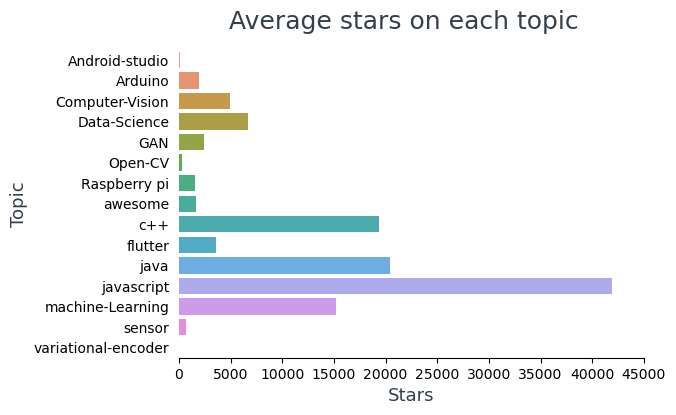

In [23]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,45000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Star', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Stars', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average stars on each topic',fontsize=18, color = '#333F4B');

In [24]:
# top 10 most starred repos
github_df.nlargest(n=10, columns='Star')[['Repo_Name','Topic','Star']]

,Repo_Name,Topic,Star
1000,freeCodeCamp,javascript,310000.0
1001,vue,javascript,163000.0
1002,react,javascript,147000.0
100,tensorflow,machine-Learning,144000.0
1003,bootstrap,javascript,140000.0
1004,You-Dont-Know-JS,javascript,120000.0
1100,coding-interview-university,c++,110000.0
800,CS-Notes,java,98400.0
1101,CS-Notes,c++,98400.0
801,javascript,java,94800.0


In [25]:
# Quick Tip: '\033[1m' prints a string in bold and '\033[0m' prints it back normally.
print('Most starred repository is {}{}{} in the topic {}{}{} with {}{}{} stars'.
      format('\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Topic'],'\033[0m',
            '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Star'],'\033[0m'))

Most starred repository is freeCodeCamp in the topic javascript with 310000.0 stars


<i><font size='4' color='green'> <b>In the top 10 most starred repositories, 4 are frameworks (vue, react, tensorflow, bootstrap) and 6 of them are about JavaScript.</b> </font></i>

## 1.2 Analysis of Watch

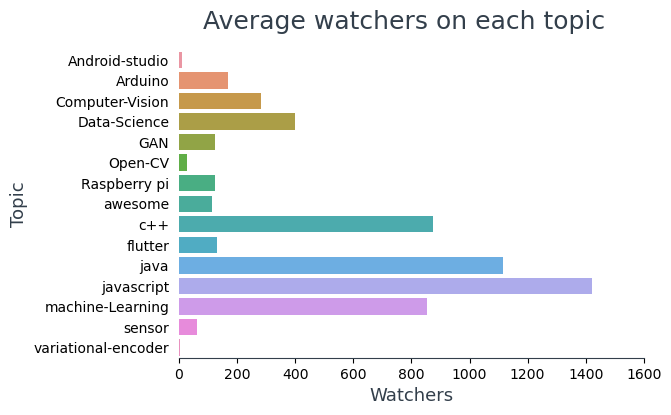

In [26]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,1600)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Watch', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Watchers', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Average watchers on each topic',fontsize=18, color = '#333F4B');

In [27]:
# top 10 most watched repos
github_df.nlargest(n=10, columns='Watch')[['Repo_Name','Topic','Watch']]

,Repo_Name,Topic,Watch
100,tensorflow,machine-Learning,8400.0
1000,freeCodeCamp,javascript,8400.0
1003,bootstrap,javascript,7200.0
1133,CodeHub,c++,6800.0
1002,react,javascript,6700.0
1001,vue,javascript,6100.0
1100,coding-interview-university,c++,5800.0
1010,free-programming-books-zh_CN,javascript,5500.0
1004,You-Dont-Know-JS,javascript,5400.0
800,CS-Notes,java,4800.0


In [28]:
print('Most watched repository is {}{}{} in the topic {}{}'.
      format('\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Topic']))

Most watched repository is tensorflow in the topic machine-Learning
